In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [35]:
os.chdir('../modeldetect/')
from model_viz import *

In [36]:
df = sns.load_dataset('titanic')

In [37]:
df_copy = df.copy()

In [38]:
ignore_feats = []

In [39]:
le = LabelEncoder()

In [40]:
for col in df.select_dtypes(include=['object','category']).columns:
    df[col] = le.fit_transform(df[col])

In [41]:
df['age'] = df['age'].fillna(df['age'].mean())

In [42]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [43]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [44]:
# Define features and target variable
X = df.iloc[:,1:]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize the Logistic Regression model
clf_model = LogisticRegression(class_weight='balanced')

# Train the model
clf_model.fit(X_train, y_train)

# Make predictions
y_pred = clf_model.predict_proba(df.iloc[:,1:])

In [46]:
y_pred[0]

array([0.98581647, 0.01418353])

In [47]:
df['score'] = [x[1] for x in y_pred]

In [48]:
mv = ModelViz()

(1.0,
    fpr  tpr  1-fpr   tf  thresholds
 0  0.0  1.0    1.0  0.0    0.916306,
 <Axes: title={'center': 'Receiver Operating Characteristics'}, xlabel='1-False Positive Rate', ylabel='True Positive Rate'>,
 <Axes: title={'center': 'Target Separability'}, xlabel='score', ylabel='Density'>)

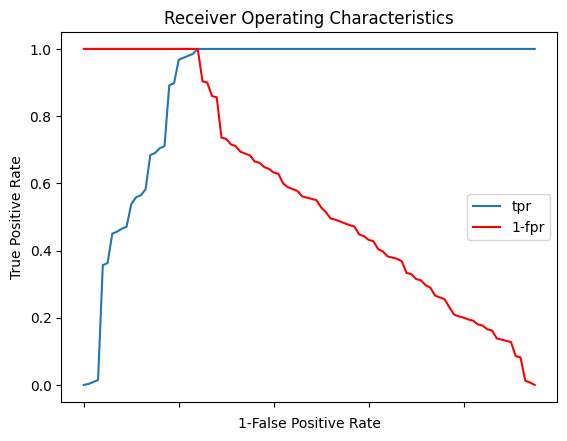

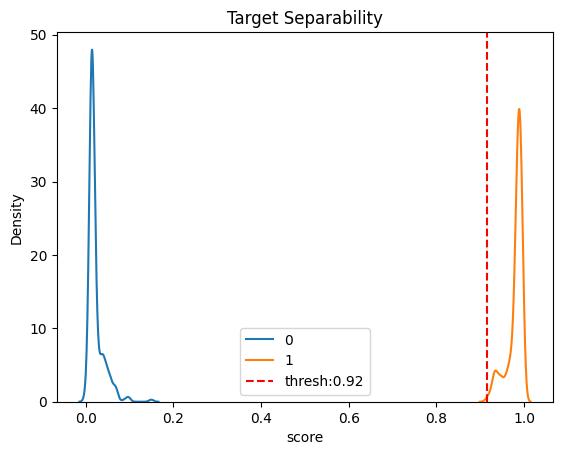

In [49]:
mv.get_optimum_threshold(df,'survived','score')

(   DecileRank  count  sum  cumsum        gain
 0           1     90   90      90   26.315789
 1           2     89   89     179   52.339181
 2           3     89   89     268   78.362573
 3           4     89   74     342  100.000000
 4           5     89    0     342  100.000000
 5           6     89    0     342  100.000000
 6           7     89    0     342  100.000000
 7           8     89    0     342  100.000000
 8           9     89    0     342  100.000000
 9          10     89    0     342  100.000000,
 <Figure size 1200x800 with 1 Axes>)

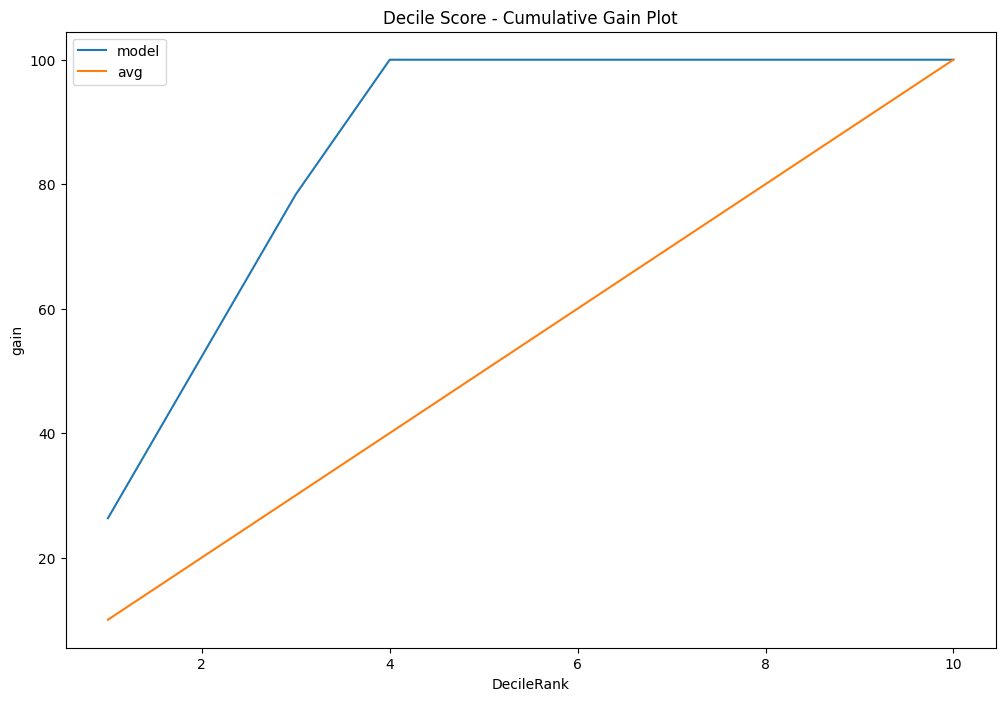

In [50]:
mv.get_decile_score(df,'survived','score')

In [51]:
print(mv.get_classification_report(clf_model,X_test,y_test),0.89)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179
 0.89


In [52]:
Cat_vars = df_copy.select_dtypes(include=['object','category']).columns.to_list()

In [53]:
Cat_vars

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

In [60]:
# mv.get_information_value(df_copy, Cat_vars,['survived'])

In [61]:
# df_copy